read in data for inpatient and outpatient data files.

In [1]:
import pandas as pd
in_patient_train = pd.read_csv('./data/Train_Inpatient.csv')
out_patient_train = pd.read_csv('./data/Train_Outpatient.csv')

read in the provider fraud labels

In [2]:
train_label = pd.read_csv('./data/Train.csv')

create base files for provider attributes with fraud labels

In [3]:
inpt_provider = pd.DataFrame(in_patient_train['Provider'].unique())
inpt_provider.columns = ['Provider']
inpt_provider = pd.merge(inpt_provider,train_label, on = 'Provider')
outpt_provider = pd.DataFrame(out_patient_train['Provider'].unique())
outpt_provider.columns = ['Provider']
outpt_provider = pd.merge(outpt_provider,train_label, on = 'Provider')

load graphics modules

In [8]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

add number of attending physicians for each provider

In [9]:
a = in_patient_train[['Provider','AttendingPhysician']].groupby('Provider').nunique()
b = pd.DataFrame(a.index,a['AttendingPhysician'])
b = b.reset_index()
inpt_provider = pd.merge(inpt_provider, b, on = 'Provider')
inpt_provider['logattnd'] = np.log(inpt_provider['AttendingPhysician']+1)

,Provider,PotentialFraud,AttendingPhysician,logattnd
0,PRV55912,Yes,37,3.637586
1,PRV55907,No,35,3.583519
2,PRV56046,No,2,1.098612
3,PRV52405,No,7,2.079442
4,PRV56614,No,7,2.079442
...,...,...,...,...
2087,PRV55706,No,1,0.693147
2088,PRV51572,No,1,0.693147
2089,PRV55688,No,1,0.693147
2090,PRV56485,No,1,0.693147


In [10]:
a = out_patient_train[['Provider','AttendingPhysician']].groupby('Provider').nunique()
b = pd.DataFrame(a.index,a['AttendingPhysician'])
b = b.reset_index()
outpt_provider = pd.merge(outpt_provider, b, on = 'Provider')
outpt_provider['logattnd'] = np.log(outpt_provider['AttendingPhysician']+1)

density plots of fraud and not fraud for in-patient, see a thicker high-number tail for fraud

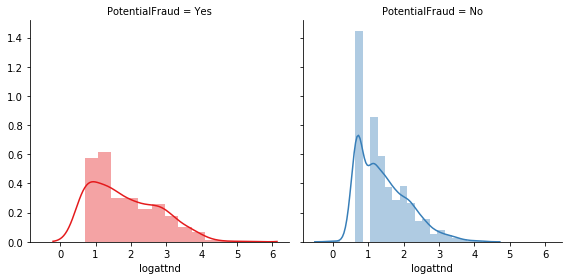

In [11]:
fraudGrid = sns.FacetGrid(inpt_provider, col='PotentialFraud', hue="PotentialFraud", palette="Set1", height=4)
fraudGrid.map(sns.distplot, "logattnd")

the mode of the ditribution for fraud for outpatient is higher than for not fraud

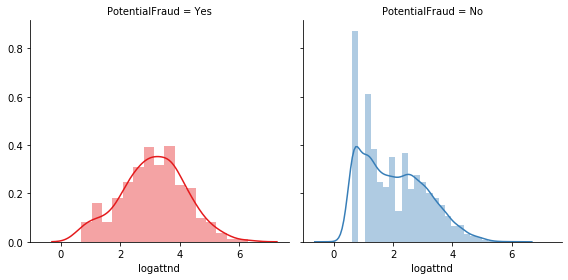

In [12]:
fraudGrid = sns.FacetGrid(outpt_provider, col='PotentialFraud', hue="PotentialFraud", palette="Set1", height=4)
fraudGrid.map(sns.distplot, "logattnd")

now look at number of beneficiaries by fraud and not fraud.  still a thicker high-number tail for the fraud set for both inpatient and outpatient.  the outpatient providers also have more patients overall.

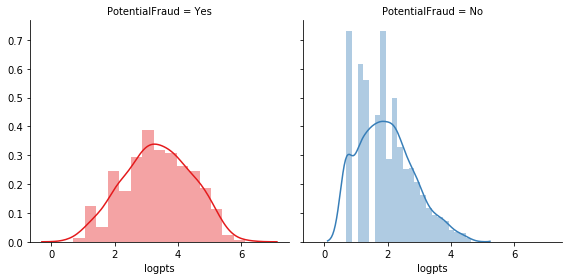

In [13]:
c = in_patient_train[['Provider','BeneID']].groupby('Provider').nunique()
d = pd.DataFrame(c.index,c['BeneID'])
d = d.reset_index()
inpt_provider = pd.merge(inpt_provider, d, on = 'Provider')
inpt_provider['logpts'] = np.log(inpt_provider['BeneID']+1)
fraudGrid = sns.FacetGrid(inpt_provider, col='PotentialFraud', hue="PotentialFraud", palette="Set1", height=4)
fraudGrid.map(sns.distplot, "logpts")

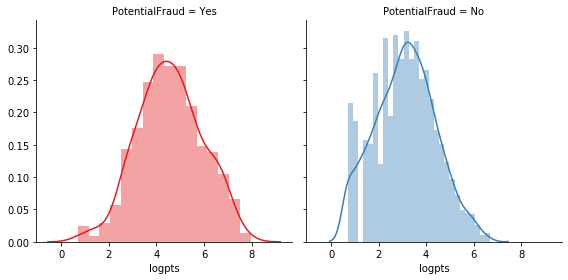

In [14]:
c = out_patient_train[['Provider','BeneID']].groupby('Provider').nunique()
d = pd.DataFrame(c.index,c['BeneID'])
d = d.reset_index()
outpt_provider = pd.merge(outpt_provider, d, on = 'Provider')
outpt_provider['logpts'] = np.log(outpt_provider['BeneID']+1)
fraudGrid = sns.FacetGrid(outpt_provider, col='PotentialFraud', hue="PotentialFraud", palette="Set1", height=4)
fraudGrid.map(sns.distplot, "logpts")

look at the average number of codes per claim for inpatient. The averages look the same, but the distribution for the fraud is much narrower, relatively heavier tails.

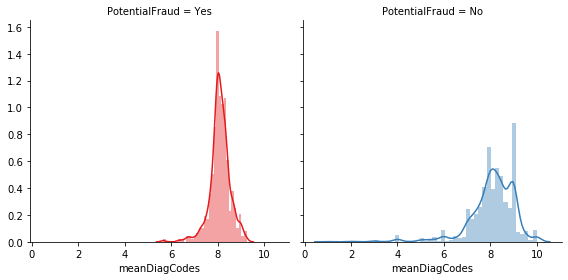

In [15]:
diag_codes = ['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
    'ClmDiagnosisCode_10']
proced_colmn = ['ClmProcedureCode_1', 'ClmProcedureCode_2','ClmProcedureCode_3', 'ClmProcedureCode_4', 
                'ClmProcedureCode_5','ClmProcedureCode_6']
in_patient_train['NumDiagCodes'] = in_patient_train[diag_codes].notnull().to_numpy().sum(axis = 1)
in_patient_train['NumProcCodes'] = in_patient_train[proced_colmn].notnull().to_numpy().sum(axis = 1)
e = in_patient_train.groupby('Provider').agg('mean')['NumDiagCodes']
f = pd.DataFrame(e.index,e)
f = f.reset_index()
f.columns = ['meanDiagCodes','Provider']
inpt_provider = pd.merge(inpt_provider, f, on = 'Provider')
fraudGrid = sns.FacetGrid(inpt_provider, col='PotentialFraud', hue="PotentialFraud", palette="Set1", height=4)
fraudGrid.map(sns.distplot, "meanDiagCodes")

I had thought a narrow distribution would mean a narrower range in the number of diagnostic codes per claim for the fraud group.  In fact, the opposite is true, and the range is wider for the fraud group.

/Users/doug/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


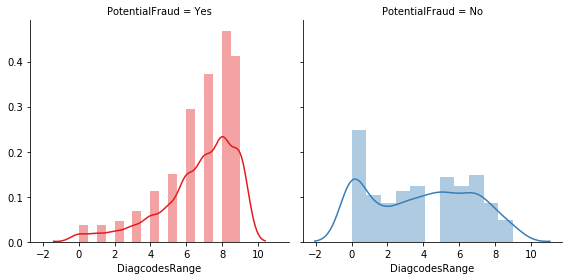

In [18]:
e = in_patient_train.groupby('Provider')['NumDiagCodes'].max() - in_patient_train.groupby('Provider')['NumDiagCodes'].min()
f = pd.DataFrame(e.index,e)
f = f.reset_index()
f.columns = ['DiagcodesRange','Provider']
inpt_provider = pd.merge(inpt_provider, f, on = 'Provider')
fraudGrid = sns.FacetGrid(inpt_provider, col='PotentialFraud', hue="PotentialFraud", palette="Set1", size=4)
fraudGrid.map(sns.distplot, "DiagcodesRange")

now examine the outpatient number of diagnostic codes, and see the same narrow distribution at about 2-3 codes per claim

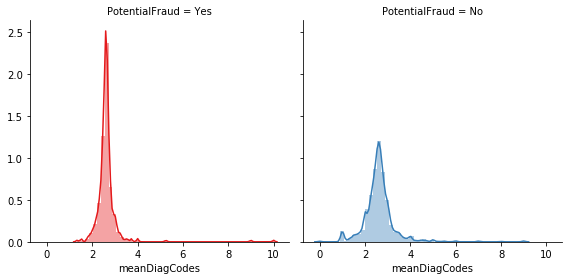

In [19]:
out_patient_train['NumDiagCodes'] = out_patient_train[diag_codes].notnull().to_numpy().sum(axis = 1)
out_patient_train['NumProcCodes'] = out_patient_train[proced_colmn].notnull().to_numpy().sum(axis = 1)
e = out_patient_train.groupby('Provider').agg('mean')['NumDiagCodes']
f = pd.DataFrame(e.index,e)
f = f.reset_index()
f.columns = ['meanDiagCodes','Provider']
outpt_provider = pd.merge(outpt_provider, f, on = 'Provider')
fraudGrid = sns.FacetGrid(outpt_provider, col='PotentialFraud', hue="PotentialFraud", palette="Set1", height=4)
fraudGrid.map(sns.distplot, "meanDiagCodes")

unlike in-patient, there isn't much of a difference between fraud and not fraud for the sum of diagnostic codes on a claim for outpatient

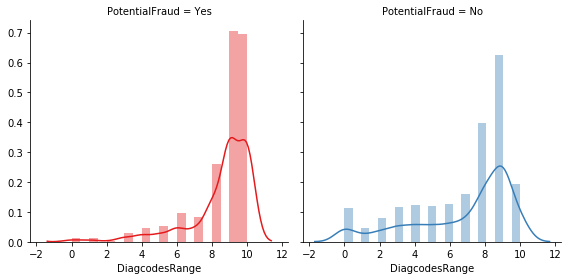

In [20]:
e = out_patient_train.groupby('Provider')['NumDiagCodes'].max() - out_patient_train.groupby('Provider')['NumDiagCodes'].min()
f = pd.DataFrame(e.index,e)
f = f.reset_index()
f.columns = ['DiagcodesRange','Provider']
outpt_provider = pd.merge(outpt_provider, f, on = 'Provider')
fraudGrid = sns.FacetGrid(outpt_provider, col='PotentialFraud', hue="PotentialFraud", palette="Set1", height=4)
fraudGrid.map(sns.distplot, "DiagcodesRange")

now look at the number of procedural codes on a claim and see the means are for both fraud and not fraud are between 0 and 1.

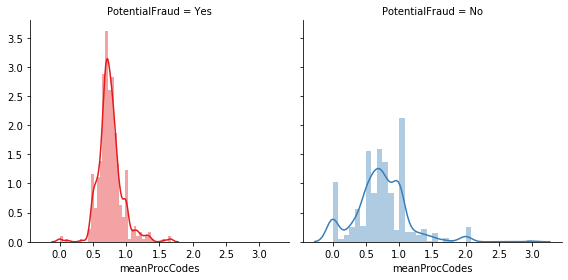

In [22]:
g = in_patient_train.groupby('Provider').agg('mean')['NumProcCodes']
h = pd.DataFrame(g.index,g)
h = h.reset_index()
h.columns = ['meanProcCodes','Provider']
inpt_provider = pd.merge(inpt_provider, h, on = 'Provider')
fraudGrid = sns.FacetGrid(inpt_provider, col='PotentialFraud', hue="PotentialFraud", palette="Set1", height=4)
fraudGrid.map(sns.distplot, "meanProcCodes")

for the range in diagnostic codes, it seems the fraud group also has a slightly larger range of procedural codes on their claims

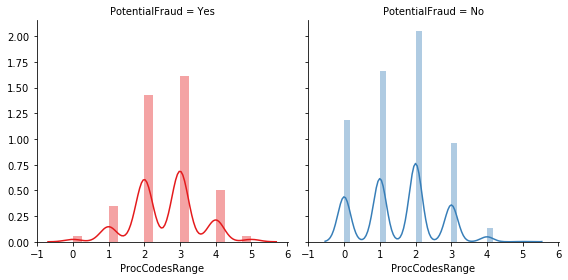

In [23]:
g = in_patient_train.groupby('Provider')['NumProcCodes'].max() - in_patient_train.groupby('Provider')['NumProcCodes'].min()
h = pd.DataFrame(g.index,g)
h = h.reset_index()
h.columns = ['ProcCodesRange','Provider']
inpt_provider = pd.merge(inpt_provider, h, on = 'Provider')
fraudGrid = sns.FacetGrid(inpt_provider, col='PotentialFraud', hue="PotentialFraud", palette="Set1", height=4)
fraudGrid.map(sns.distplot, "ProcCodesRange")

wanted to do the same analysis on the outpatient group, but getting error.  I can't find the 'scott' referred to in the error message.

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

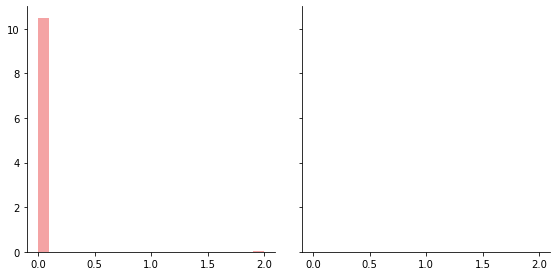

In [36]:
# g = out_patient_train.groupby('Provider').agg('mean')['NumProcCodes']
# h = pd.DataFrame(g.index,g)
# h = h.reset_index()
# h.columns = ['meanProcCodes','Provider']
# outpt_provider = pd.merge(outpt_provider, h, on = 'Provider')
fraudGrid = sns.FacetGrid(outpt_provider, col='PotentialFraud', hue="PotentialFraud", palette="Set1", height=4)
fraudGrid.map(sns.distplot, "meanProcCodes")

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

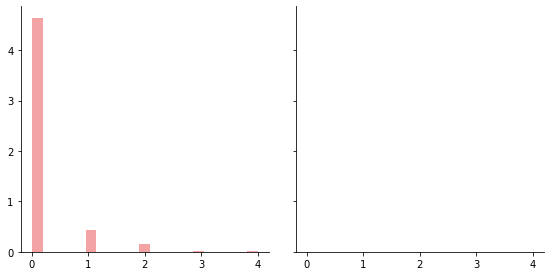

In [37]:
g = out_patient_train.groupby('Provider')['NumProcCodes'].max() - out_patient_train.groupby('Provider')['NumProcCodes'].min()
h = pd.DataFrame(g.index,g)
h = h.reset_index()
h.columns = ['ProcCodesRange','Provider']
outpt_provider = pd.merge(outpt_provider, h, on = 'Provider')
fraudGrid = sns.FacetGrid(outpt_provider, col='PotentialFraud', hue="PotentialFraud", palette="Set1", height=4)
fraudGrid.map(sns.distplot, "ProcCodesRange")

look at reimbursement amounts between fraud and not fraud for inpatient

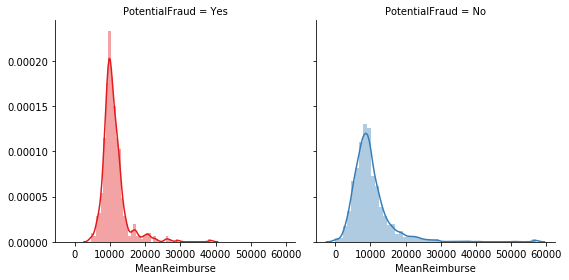

In [54]:
m = in_patient_train.groupby('Provider').agg('mean')['InscClaimAmtReimbursed']
n = pd.DataFrame(m.index,m)
n = n.reset_index()
n.columns = ['MeanReimburse','Provider']
inpt_provider = pd.merge(inpt_provider, n, on = 'Provider')
fraudGrid = sns.FacetGrid(inpt_provider, col='PotentialFraud', hue="PotentialFraud", palette="Set1", height=4)
fraudGrid.map(sns.distplot, "MeanReimburse")

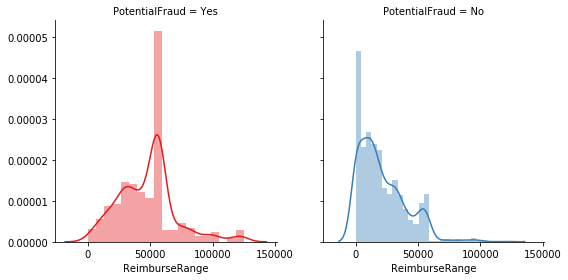

In [56]:
m = in_patient_train.groupby('Provider')['InscClaimAmtReimbursed'].max() - in_patient_train.groupby('Provider')['InscClaimAmtReimbursed'].min()
n = pd.DataFrame(m.index,m)
n = n.reset_index()
n.columns = ['ReimburseRange','Provider']
inpt_provider = pd.merge(inpt_provider, n, on = 'Provider')
fraudGrid = sns.FacetGrid(inpt_provider, col='PotentialFraud', hue="PotentialFraud", palette="Set1", height=4)
fraudGrid.map(sns.distplot, "ReimburseRange")

now look at outpatient, this is bizarre and I'm not sure if it's an artifact of the groupby or what.  The fraud set has providers whose average is very hight.

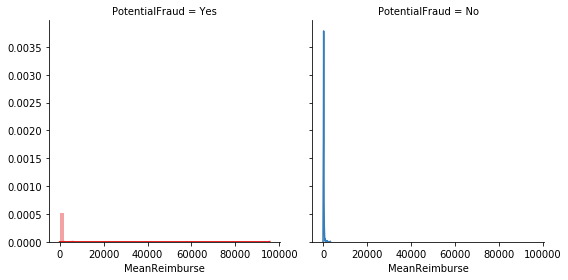

In [57]:
m = out_patient_train.groupby('Provider').agg('mean')['InscClaimAmtReimbursed']
n = pd.DataFrame(m.index,m)
n = n.reset_index()
n.columns = ['MeanReimburse','Provider']
outpt_provider = pd.merge(outpt_provider, n, on = 'Provider')
fraudGrid = sns.FacetGrid(outpt_provider, col='PotentialFraud', hue="PotentialFraud", palette="Set1", height=4)
fraudGrid.map(sns.distplot, "MeanReimburse")

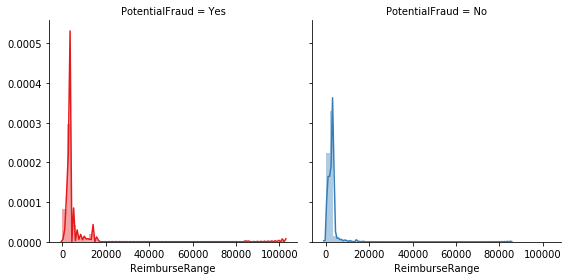

In [58]:
m = out_patient_train.groupby('Provider')['InscClaimAmtReimbursed'].max() - out_patient_train.groupby('Provider')['InscClaimAmtReimbursed'].min()
n = pd.DataFrame(m.index,m)
n = n.reset_index()
n.columns = ['ReimburseRange','Provider']
outpt_provider = pd.merge(outpt_provider, n, on = 'Provider')
fraudGrid = sns.FacetGrid(outpt_provider, col='PotentialFraud', hue="PotentialFraud", palette="Set1", height=4)
fraudGrid.map(sns.distplot, "ReimburseRange")

let's look at total claims for providers, along with average claims per beneficiary and per physician

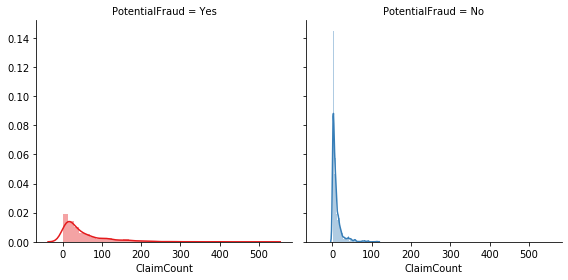

In [66]:
m = in_patient_train.groupby('Provider')['ClaimID'].count()
n = pd.DataFrame(m.index,m)
n = n.reset_index()
n.columns = ['ClaimCount','Provider']
inpt_provider = pd.merge(inpt_provider, n, on = 'Provider')
fraudGrid = sns.FacetGrid(inpt_provider, col='PotentialFraud', hue="PotentialFraud", palette="Set1", height=4)
fraudGrid.map(sns.distplot, "ClaimCount")

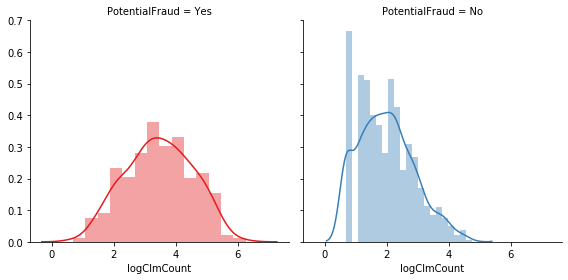

In [67]:
inpt_provider['logClmCount'] = np.log(inpt_provider['ClaimCount']+1)
fraudGrid = sns.FacetGrid(inpt_provider, col='PotentialFraud', hue="PotentialFraud", palette="Set1", height=4)
fraudGrid.map(sns.distplot, "logClmCount")

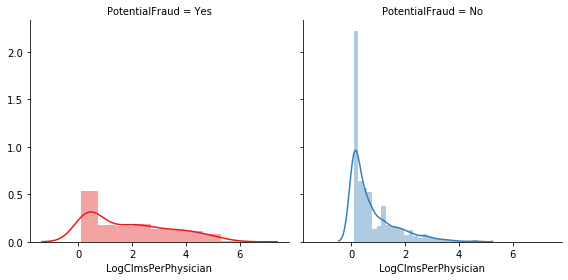

In [70]:
inpt_provider['LogClmsPerPhysician'] = np.log(inpt_provider['ClaimCount']/(inpt_provider['AttendingPhysician']+0.01)+0.1)
inpt_provider['LogClmsPerPatnt'] = np.log(inpt_provider['ClaimCount']/(inpt_provider['BeneID']+0.01)+0.1)
fraudGrid = sns.FacetGrid(inpt_provider, col='PotentialFraud', hue="PotentialFraud", palette="Set1", height=4)
fraudGrid.map(sns.distplot, "LogClmsPerPhysician")

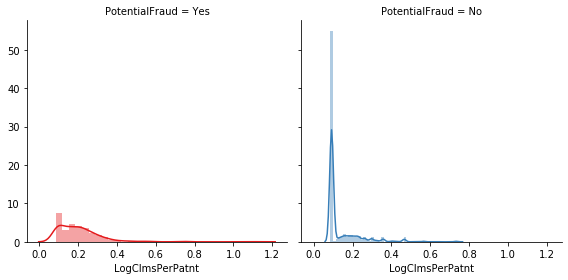

In [71]:
fraudGrid = sns.FacetGrid(inpt_provider, col='PotentialFraud', hue="PotentialFraud", palette="Set1", height=4)
fraudGrid.map(sns.distplot, "LogClmsPerPatnt")

checkpoint to to print out file for inpatient provider attribute file

In [72]:
inpt_provider.to_csv('inpatnt_provider_attributes.csv')

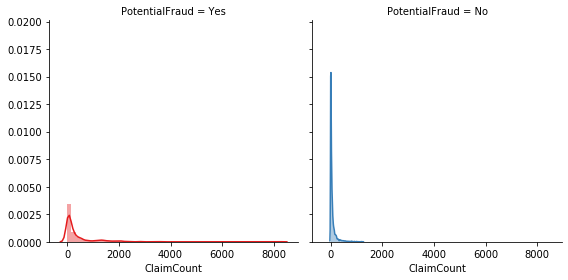

In [73]:
m = out_patient_train.groupby('Provider')['ClaimID'].count()
n = pd.DataFrame(m.index,m)
n = n.reset_index()
n.columns = ['ClaimCount','Provider']
outpt_provider = pd.merge(outpt_provider, n, on = 'Provider')
fraudGrid = sns.FacetGrid(outpt_provider, col='PotentialFraud', hue="PotentialFraud", palette="Set1", height=4)
fraudGrid.map(sns.distplot, "ClaimCount")

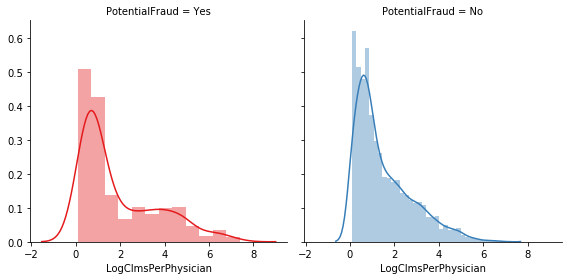

In [75]:
outpt_provider['LogClmsPerPhysician'] = np.log(outpt_provider['ClaimCount']/(outpt_provider['AttendingPhysician']+0.01)+0.1)
outpt_provider['LogClmsPerPatnt'] = np.log(outpt_provider['ClaimCount']/(outpt_provider['BeneID']+0.01)+0.1)
fraudGrid = sns.FacetGrid(outpt_provider, col='PotentialFraud', hue="PotentialFraud", palette="Set1", height=4)
fraudGrid.map(sns.distplot, "LogClmsPerPhysician")

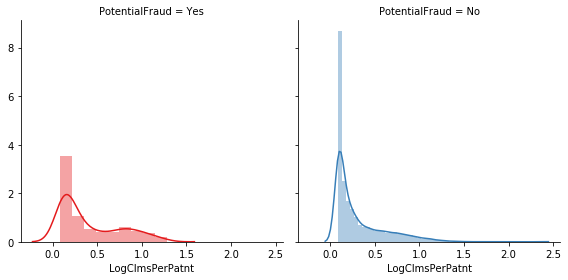

In [76]:
fraudGrid = sns.FacetGrid(outpt_provider, col='PotentialFraud', hue="PotentialFraud", palette="Set1", height=4)
fraudGrid.map(sns.distplot, "LogClmsPerPatnt")

In [77]:
outpt_provider.to_csv('outpatnt_provider_attributes.csv')